
<h1>ASSIGNMENT ON CLUSTERING</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4>Try out different clustering models in the given dataset. Find the optimum number
of clusters in each model and create the model with the optimum number of
clusters.</h4>

In [2]:
data=pd.read_csv('Wine_clust.csv')

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data[data.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


<Axes: >

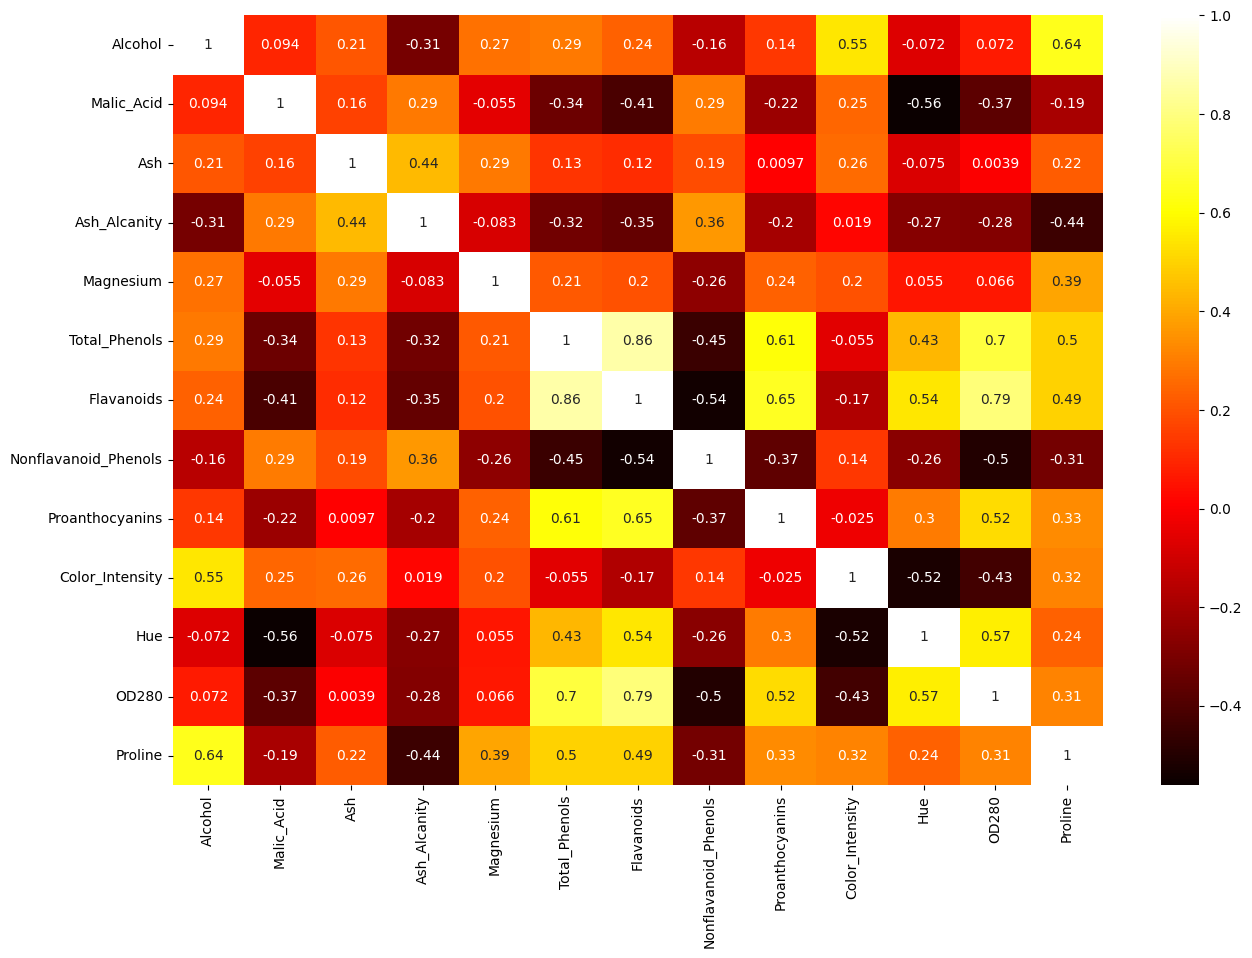

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='hot')

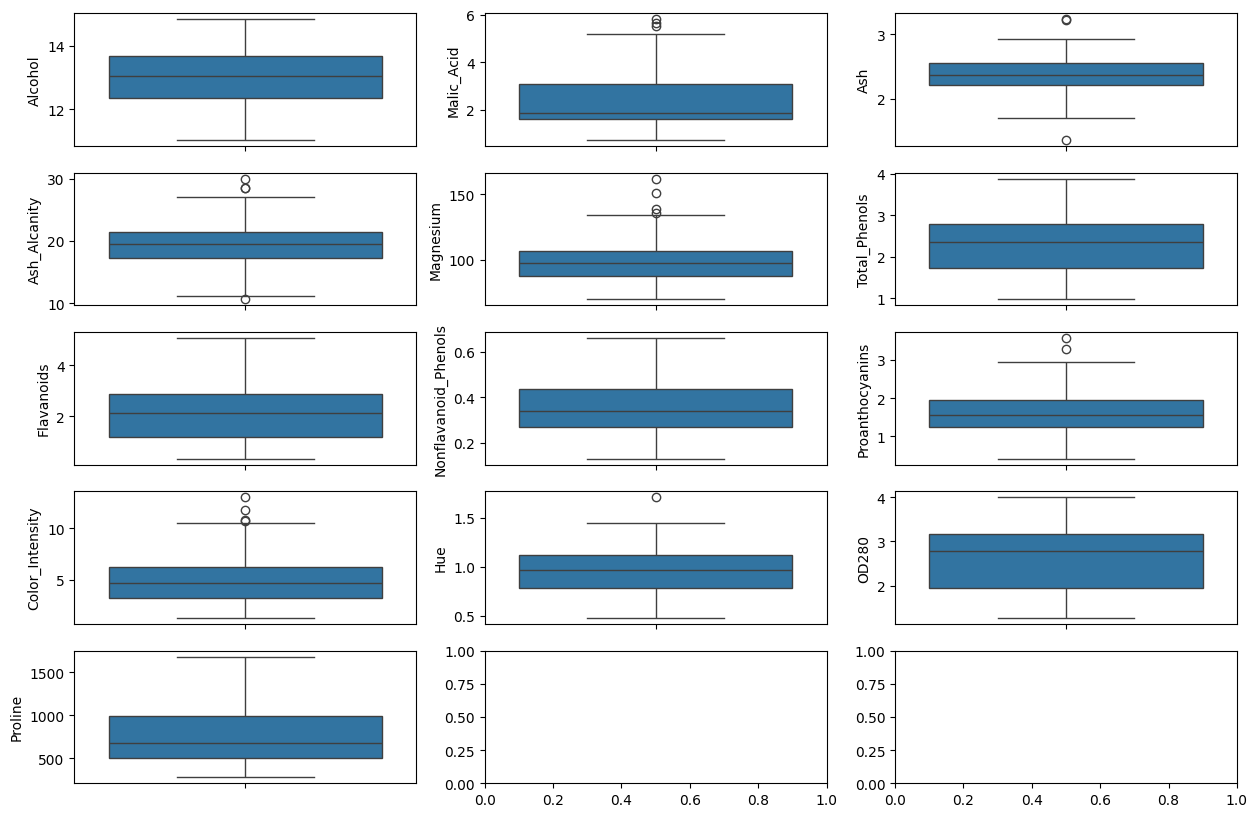

In [9]:
data_cols=data.columns

fig,axes=plt.subplots(5,3,figsize=(15,10))
col=0
for i in range(5):
  for j in range(3):
    sns.boxplot(data=data[data_cols[col]],ax=axes[i,j])
    col=col+1
    if col==(len(data_cols)):
      break
  if col==(len(data_cols)):
      break  

In [10]:
for column in data.columns:
  column_mean=data[column].mean()
  outlier_list=[]
  q1=np.percentile(data[column],25)
  q3=np.percentile(data[column],75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  outlier_list=data[(data[column]>upper)|(data[column]<lower)].index
  for i in outlier_list:
    data.loc[i,column]=column_mean


C:\Users\kannoth\AppData\Local\Temp\ipykernel_3624\3446545106.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.74157303370787' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,column]=column_mean


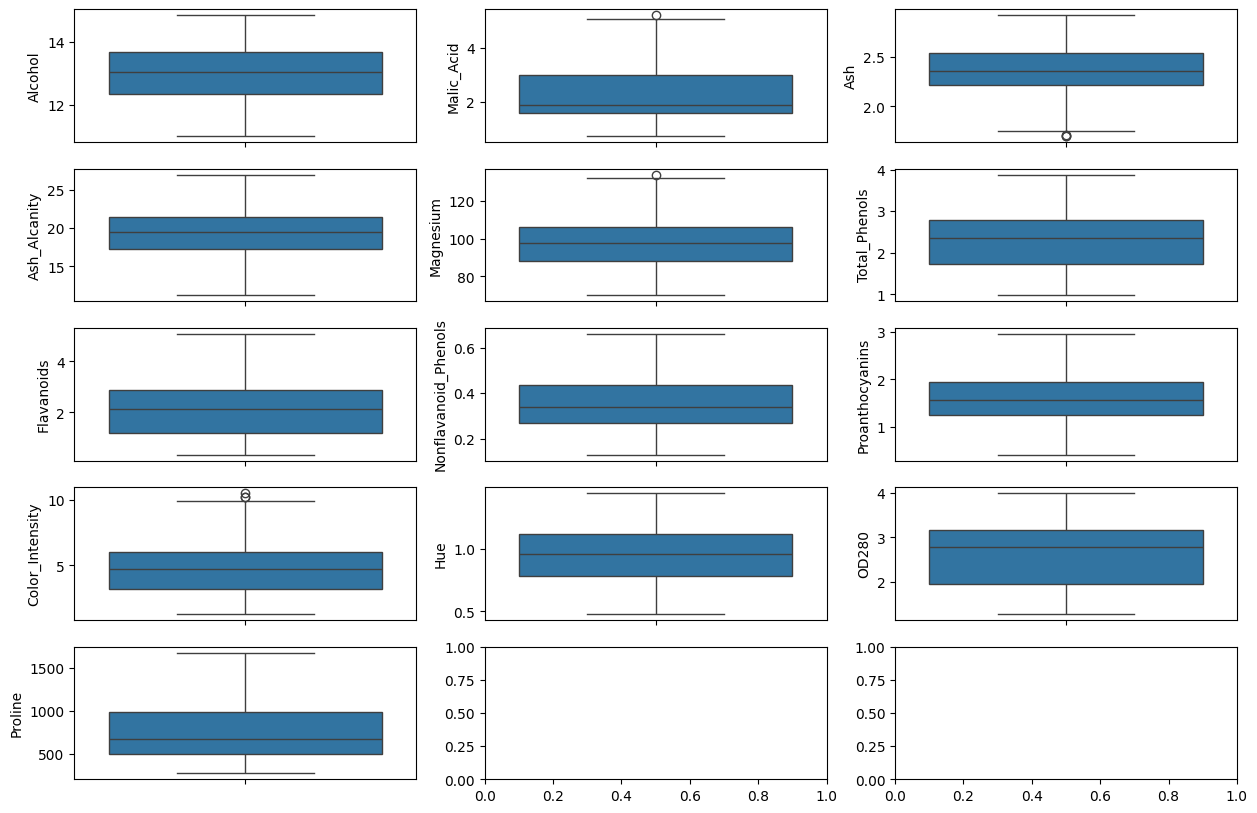

In [11]:
data_cols=data.columns

fig,axes=plt.subplots(5,3,figsize=(15,10))
col=0
for i in range(5):
  for j in range(3):
    sns.boxplot(data=data[data_cols[col]],ax=axes[i,j])
    col=col+1
    if col==(len(data_cols)):
      break
  if col==(len(data_cols)):
      break  

<h4>KMEANS CLUSTERING</h4>

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,12):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(data)
  wcss.append(model.inertia_)

In [14]:
wcss

[17582162.59684754,
 4534349.1085127955,
 2696367.0002038567,
 1343202.1691095578,
 956771.0546086585,
 676262.1029211886,
 407232.4467974089,
 318766.1144641447,
 272431.3707228056,
 219395.3754893135,
 192511.92793931352]

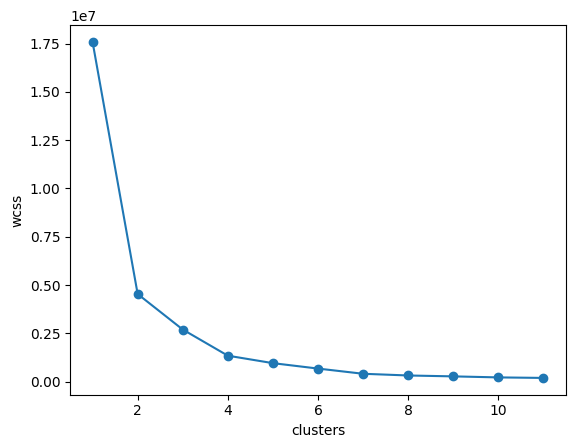

In [15]:
plt.plot(np.arange(1,12,1),wcss,'-o')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

<b>optimal no.of clusters would be : 2</b>

In [16]:
kmeans_model=KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_model.fit(data)
kmeans_model_y_pred=kmeans_model.predict(data)
kmeans_model_y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
kmeans_silhouette_score=silhouette_score(data,kmeans_model_y_pred)
print(f'SILHOUETTE SCORE : {kmeans_silhouette_score}')

SILHOUETTE SCORE : 0.657652236462555


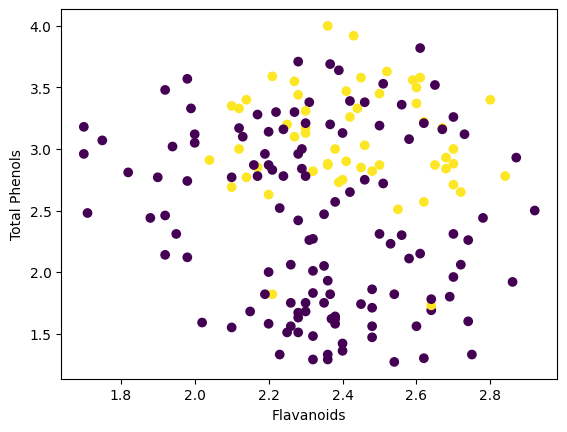

In [19]:
plt.scatter(data['Ash'],data['OD280'],c=kmeans_model_y_pred)
plt.xlabel('Flavanoids')
plt.ylabel('Total Phenols')
plt.show()


<h4>AGGLOMERATIVE CLUSTERING</h4>

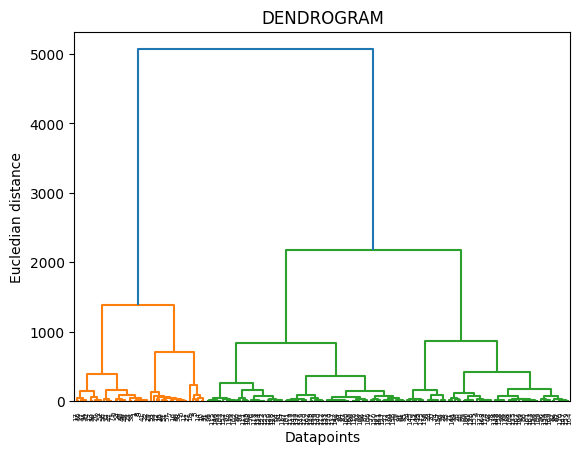

In [20]:
from scipy.cluster import hierarchy as sch

sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('DENDROGRAM')
plt.xlabel('Datapoints')
plt.ylabel('Eucledian distance')
plt.show()

<b>optimal no.of clusters would be : 2</b>

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
ahc_model=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
ahc_model_y_pred=ahc_model.fit_predict(data)
ahc_model_y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
ahc_silhouette_score=silhouette_score(data,ahc_model_y_pred)
print(f'SILHOUETTE SCORE : {ahc_silhouette_score}')

SILHOUETTE SCORE : 0.6577318051558533


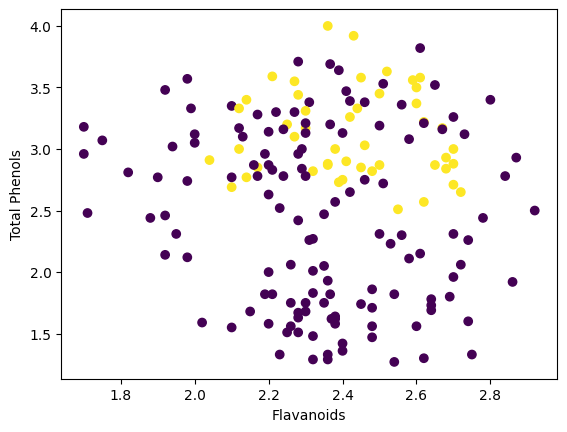

In [24]:
plt.scatter(data['Ash'],data['OD280'],c=ahc_model_y_pred)
plt.xlabel('Flavanoids')
plt.ylabel('Total Phenols')
plt.show()


In [25]:
silhouette_score_df=pd.DataFrame({'Model':['Kmeans','Aggl Clustering'],'Silhouette Score':[kmeans_silhouette_score,ahc_silhouette_score]},)
silhouette_score_df

,Model,Silhouette Score
0,Kmeans,0.657652
1,Aggl Clustering,0.657732
